In [2]:
import sklearn
print(sklearn.__version__)

0.23.2


In [3]:
# import the necessary libraries
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

In [6]:
# loading the dataset

salary_data = pd.read_csv('salaryData.csv')

In [7]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
salary_data.shape

(30, 2)

In [9]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
salary_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [15]:
# all cleaning and pre-processing should be done in pandas and then 
# converted into numpy arrays before feeding into ML algo.
# because numpy is very optimised and hence   for ML we use numpys extensively.

#https://sparkbyexamples.com/pandas/pandas-difference-between-loc-vs-iloc-in-dataframe/#:~:text=The%20main%20difference%20between%20pandas,it%20gives%20an%20index%20error.

# what is the difference between iloc and loc
# both are used in pandas and have the syntax dataframe.iloc or dataframe.loc
# use df.loc when we know the names of the rows and columns-- 
# eg:  df.loc['r2'] --> single row named r2
#      df.loc[['r2', 'r3', 'r4']] --> multiple rows in an array

#      df.loc[:, 'column_1']   --> all rows of a single column
#      df.loc[:, ['column_1', 'column_2']] --> all rows of multiple columns

pandas.core.frame.DataFrame

In [17]:
x = salary_data.iloc[:, :-1].values
type(x)

numpy.ndarray

In [23]:
# another way to convert df into a numpy array is to use .to_numpy()
XX = salary_data.iloc[:, :-1].to_numpy()


In [20]:
y = salary_data.iloc[:, -1].to_numpy()

In [22]:
type(y)

numpy.ndarray

In [26]:
# how do we know linaer regression is the way forward here?
# find the corr and also do pearsonr corr test

# df.corr()
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [28]:
# pearsonr corr test
from scipy.stats import pearsonr
pearsonr(x.flatten(),y.flatten())

(0.9782416184887599, 1.1430681092271564e-20)

In [ ]:
# in the above cell we see that corr between x, y is .978 and p-value is very very low
# which means given our null hyp is true, prob of seeing a result as extreme as this 
# is given by p-value.
# Therefore we can reject our null hyp that there's no corr between x and y.
# And theres strong corr.

In [32]:
# Train Test Split

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.33, random_state = 0 )

In [33]:
print(xtrain.size)
print(xtest.size)

20
10


In [35]:
# sklearn.linear_model.LinearRegression
# from sklearn.linear_model import LinearRegression, SGDRegressor

LR_model= LinearRegression()
LR_model.fit(xtrain, ytrain)# --> fit() is running the training process

# predicting the test results
y_predicted = LR_model.predict(xtest)

In [36]:
y_predicted

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [37]:
ytest

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [38]:
# printing out the coefficients and intercept from out model
print("coefficients: ", LR_model.coef_)
print('Intercept: ', LR_model.intercept_)

coefficients:  [9345.94244312]
Intercept:  26816.19224403119


In [48]:
print("The linear model equation is: \n")
print("y = ({})x + {}".format(LR_model.coef_[0],LR_model.intercept_ ))

The linear model equation is: 

y = (9345.94244312237)x + 26816.19224403119


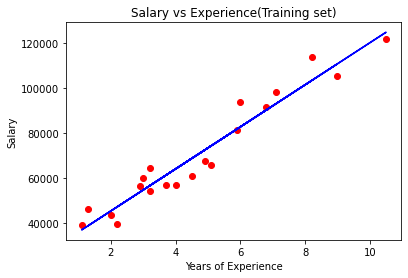

In [54]:
# Visualising the training set results
plt.scatter(xtrain, ytrain, color = "red")
plt.plot(xtrain, LR_model.predict(xtrain), color = 'blue')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [55]:
LR_model.predict([[3.0]])

array([54854.0195734])

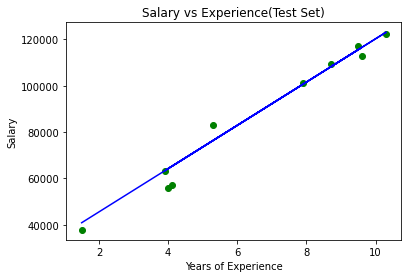

In [56]:
# Visualising the test set results
plt.scatter(xtest, ytest, color = 'green')
plt.plot(xtest, LR_model.predict(xtest), color = 'blue')
plt.title('Salary vs Experience(Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [57]:
# Metrics to know the efficiency of our model

from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(ytest, y_predicted))

0.9749154407708353


In [58]:
print(mean_squared_error(ytest, y_predicted))

21026037.329511296


In [59]:
LR_model.score(xtest, ytest)   #score() in regression problems output R2 score


0.9749154407708353

In [ ]:
# sgd regressor
# Stochastic Gradient Descent

# When is this a better algo?
# 1) when dataset is large
# 2) when data is scaled
